In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/drive/My Drive/Projects/GOT/got_scripts_breakdown.csv', delimiter=';')
df.head()

,Column1,Season,Episode,Sentence,Name,N_serie,N_Season,Emision Date
0,1,Season 1,winter is coming,What d’you expect? They’re savages One lot ste...,waymar royce,1,1,17/04/2011
1,2,Season 1,winter is coming,I’ve never seen wildlings do a thing like this...,will,1,1,17/04/2011
2,3,Season 1,winter is coming,How close did you get?,waymar royce,1,1,17/04/2011
3,4,Season 1,winter is coming,Close as any man would,will,1,1,17/04/2011
4,5,Season 1,winter is coming,We should head back to the wall,gared,1,1,17/04/2011


In [3]:
print('No. of seasons:', df.Season.nunique())
print('No. of episodes:', df.Episode.nunique())

No. of seasons: 7
No. of episodes: 67


In [4]:
from wordcloud import WordCloud, STOPWORDS
import cv2
from PIL import Image

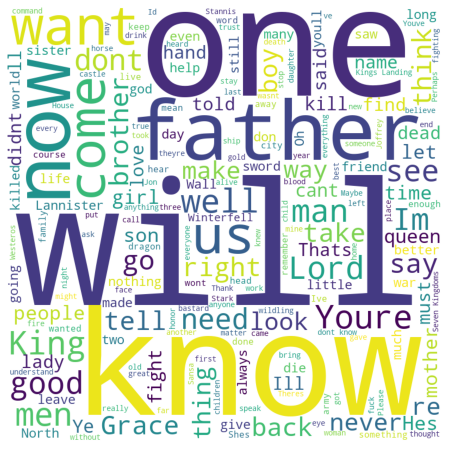

In [5]:
comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df.Sentence: 
    val = str(val) 
    tokens = val.split() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10)
wordcloud.generate(comment_words) 
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show() 

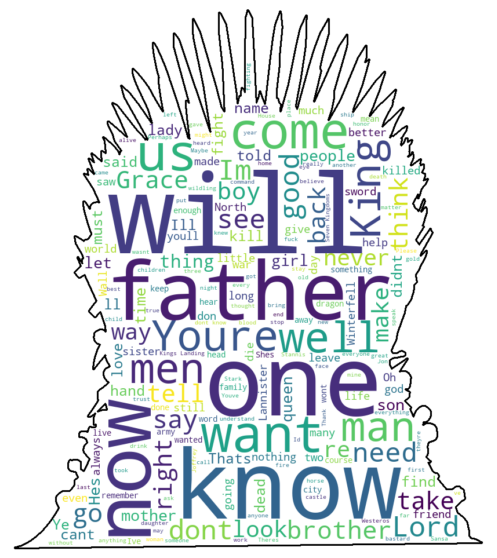

In [6]:
stopwords = set(STOPWORDS)

img = cv2.imread('/content/drive/My Drive/Projects/GOT/images/ironThrone.jpg')
ret,mask = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

wordcloud = WordCloud(background_color="white", max_words=200, mask=mask, stopwords=stopwords, contour_width=2, contour_color='black')
wordcloud.generate(comment_words)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total no. of words - 10147

Top 30 most frequent words -

['the' ',' 'you' 'i' 'to' '?' 'a' 'and' 'of' '’' 'your' 'it' 'my' 'me'
 'is' 'in' 'for' 'he' 'that' 'have' 'we' 'not' 'what' 'be' 'do' 'no' 'are'
 'was' 'with' 'they']



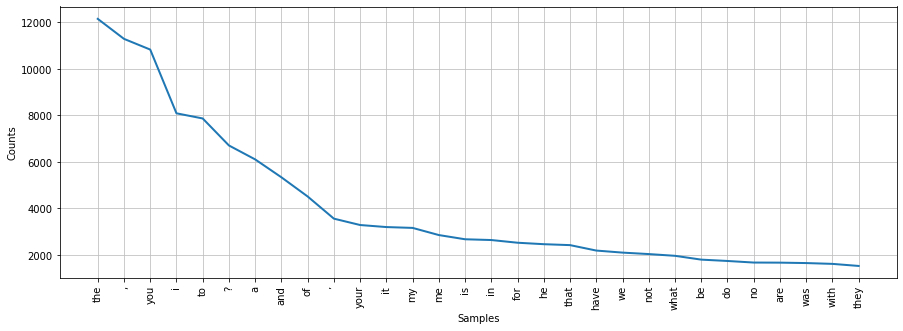

In [8]:
reviews = df.Sentence.str.cat(sep=' ')
reviews = reviews.lower()

tokens = word_tokenize(reviews)
frequency_dist = nltk.FreqDist(tokens)

print('Total no. of words -', len(set(tokens)))
print('\nTop 30 most frequent words -\n')
print(np.array(sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)).ravel()[0:30])
print()

plt.figure(figsize = (15, 5), facecolor = None) 
frequency_dist.plot(30,cumulative=False)

Total no. of words after stopwords removal - 9970

Top 30 most frequent words after stopwords removal -

['know' 'lord' 'one' 'dont' 'im' 'like' 'us' 'want' 'king' 'youre' 'would'
 'men' 'man' 'father' 'come' 'well' 'never' 'good' 'back' 'go' 'think'
 'see' 'get' 'take' 'grace' 'right' 'time' 'need' 'lady' 'could']



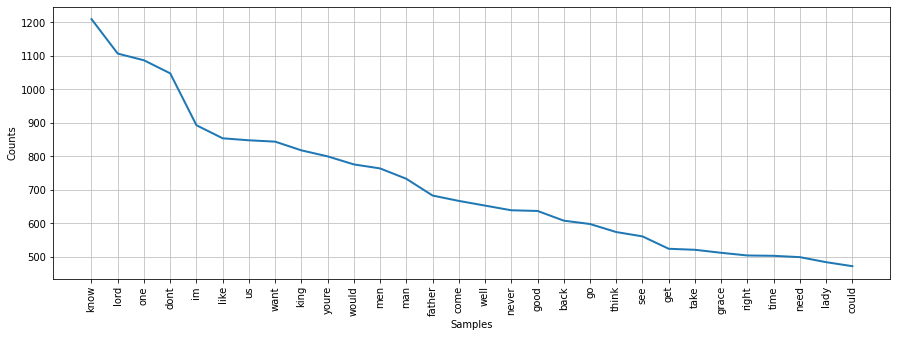

In [9]:
tokens = word_tokenize(reviews)
tokens = [w for w in tokens if not w in stop_words and len(w) > 1]

frequency_dist = nltk.FreqDist(tokens)

print('Total no. of words after stopwords removal -', len(set(tokens)))
print('\nTop 30 most frequent words after stopwords removal -\n')
print(np.array(sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)).ravel()[0:30])
print()

plt.figure(figsize = (15, 5), facecolor = None) 
frequency_dist.plot(30,cumulative=False)

In [10]:
print('Most no. of sentences by characters:')
print('-' * 50)
print(df.Name.value_counts()[:15])

Most no. of sentences by characters:
--------------------------------------------------
tyrion          1537
cersei           984
jon              954
daenerys         861
jaime            842
sansa            719
arya             690
sam              492
littlefinger     475
davos            468
theon            456
tywin            388
varys            375
bronn            360
jorah            351
Name: Name, dtype: int64


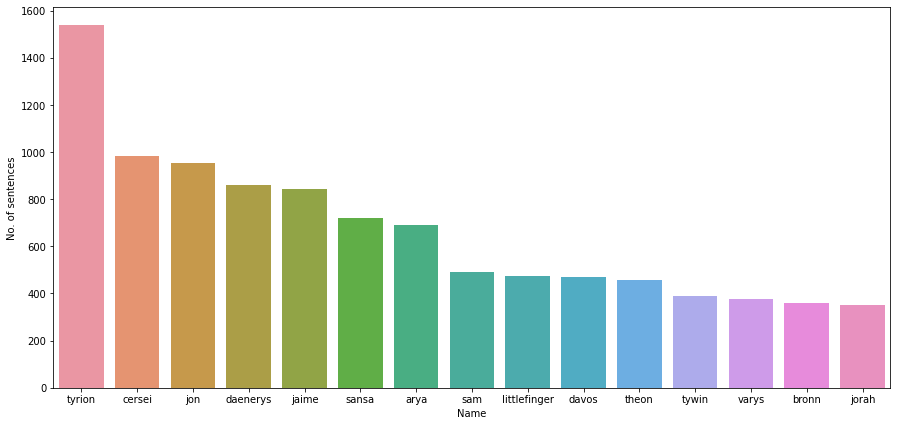

In [11]:
plt.figure(figsize = (15, 7))
sns.barplot(x=df.Name.value_counts().index[:15], y=df.Name.value_counts()[:15])
plt.xlabel('Name')
plt.ylabel('No. of sentences')
plt.show()

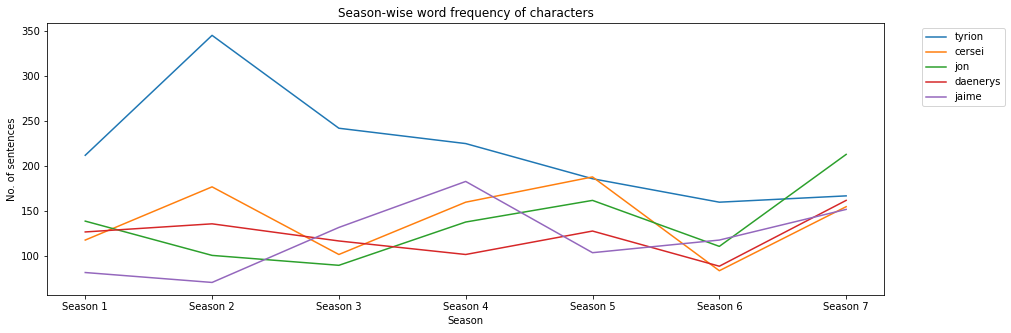

In [12]:
names_list = df.Name.value_counts().index[:5]

season = ['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5', 'Season 6', 'Season 7']

plt.figure(figsize = (15, 5), facecolor = None) 
plt.xlabel('Season')
plt.ylabel('No. of sentences')
plt.title('Season-wise word frequency of characters')

for name in names_list:
  sentence_count = df[df.Name == name].groupby('Season').count().reindex(season)['Sentence']
  last = sentence_count.last_valid_index()
  plt.plot(sentence_count[:last].fillna(0), label = name)
  plt.legend(loc = "upper right", bbox_to_anchor = (1.15, 1))
